In [1]:
def i_perforacion(v1, v2):
    # Validacion input
    if not(isinstance(v1, list) and isinstance(v2, list)):
        return 'Parametros incorrectos'
    
    if not(v1 and v2):
        return 'Contenido nulo detectado'
    
    if len(v1) != len(v2):
        return 'Ingrese listas de igual dimension'
    
    # Obtencion de intervalos
    intervalos = {
        (v1[i], v2[i]) for i in range(len(v1))
    }
    
    #Ordeno de izq -> der
    intervalos = sorted(
        intervalos, key=lambda _:_[0]
    )
    
    # Regla de interseccion
    regla_interseccion = lambda a, b: a[1] >= b[0]
    
    anteriores = [intervalos[0]]
    cardinales = []
    
    # Borrador Flujo
    for inter in intervalos[1:]:
        # Valido interseccion con los intervalos de punto inicial menor al actual
        validacion = all([regla_interseccion(ant, inter) for ant in anteriores])
        
        # Al fallar la validacion reinicio los anteriores y es necesario un punto mas
        if not validacion:
            cardinales.append(anteriores[-1][0])
            anteriores = []
        
        anteriores.append(inter)
    
    # Casos especificos
    if cardinales:
        cardinales.append(inter[0])
    else:
        cardinales.append(intervalos[-1][0])
        
    return cardinales

In [2]:
v1 = [1, 3, 5, 7, 2, 4, 11, 11]
v2 = [4, 6, 10, 9, 6, 12, 15, 16]

i_perforacion(v1, v2)

[4, 7, 11]

#2

In [3]:
import math 
math.log10(10)

1.0

In [4]:
math.log10(4)

0.6020599913279624

In [5]:
9*math.log10(3)

4.294091292476962

In [6]:
from lamp_45139145 import lamp
import numpy as np

mylist = [[1,2,3],[3,4,5],[6,7,8]]

myarray = np.asarray(mylist)
myarray

array([[1, 2, 3],
       [3, 4, 5],
       [6, 7, 8]])

In [7]:
print(dir(myarray))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmatmul__', '__

In [8]:
import pandas as pd
df = pd.read_csv('wines.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler6 = MinMaxScaler()
scaler14 = MinMaxScaler()

df[5] = scaler6.fit_transform(df[5].values.reshape(-1, 1))
df[13] = scaler14.fit_transform(df[13].values.reshape(-1, 1))
df.head()

/home/villacorta/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,0.619565,2.80,3.06,0.28,2.29,5.64,1.04,3.92,0.561341
1,1,13.20,1.78,2.14,11.2,0.326087,2.65,2.76,0.26,1.28,4.38,1.05,3.40,0.550642
2,1,13.16,2.36,2.67,18.6,0.336957,2.80,3.24,0.30,2.81,5.68,1.03,3.17,0.646933
3,1,14.37,1.95,2.50,16.8,0.467391,3.85,3.49,0.24,2.18,7.80,0.86,3.45,0.857347
4,1,13.24,2.59,2.87,21.0,0.521739,2.80,2.69,0.39,1.82,4.32,1.04,2.93,0.325963


In [10]:
df.shape

(178, 14)

In [11]:
X = df[[_ for _ in range(1,14)]]
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,0.619565,2.80,3.06,0.28,2.29,5.64,1.04,3.92,0.561341
1,13.20,1.78,2.14,11.2,0.326087,2.65,2.76,0.26,1.28,4.38,1.05,3.40,0.550642
2,13.16,2.36,2.67,18.6,0.336957,2.80,3.24,0.30,2.81,5.68,1.03,3.17,0.646933
3,14.37,1.95,2.50,16.8,0.467391,3.85,3.49,0.24,2.18,7.80,0.86,3.45,0.857347
4,13.24,2.59,2.87,21.0,0.521739,2.80,2.69,0.39,1.82,4.32,1.04,2.93,0.325963


In [12]:
target = df[0]

In [13]:
select_rows = [3,4,175,173,34,78,83,100,124,98,97,87,143]
CP = X.loc[select_rows,:].reset_index()[[_ for _ in range(1,14)]]
CP

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.37,1.95,2.50,16.8,0.467391,3.85,3.49,0.24,2.18,7.80,0.86,3.45,0.857347
1,13.24,2.59,2.87,21.0,0.521739,2.80,2.69,0.39,1.82,4.32,1.04,2.93,0.325963
2,13.27,4.28,2.26,20.0,0.543478,1.59,0.69,0.43,1.35,10.20,0.59,1.56,0.397290
3,13.71,5.65,2.45,20.5,0.271739,1.68,0.61,0.52,1.06,7.70,0.64,1.74,0.329529
4,13.51,1.80,2.65,19.0,0.434783,2.35,2.53,0.29,1.54,4.20,1.10,2.87,0.582739
5,12.33,0.99,1.95,14.8,0.717391,1.90,1.85,0.35,2.76,3.40,1.06,2.31,0.336662
6,13.05,3.86,2.32,22.5,0.163043,1.65,1.59,0.61,1.62,4.80,0.84,2.01,0.169044
7,12.08,2.08,1.70,17.5,0.293478,2.23,2.17,0.26,1.40,3.30,1.27,2.96,0.308131
8,11.87,4.31,2.39,21.0,0.130435,2.86,3.03,0.21,2.91,2.80,0.75,3.64,0.072753
9,12.37,1.07,2.10,18.5,0.195652,3.52,3.75,0.24,1.95,4.50,1.04,2.77,0.272468


In [14]:
condition_rows = df.index.isin(select_rows)
XX = X[~condition_rows].reset_index()[[_ for _ in range(1,14)]]
XX.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,0.619565,2.80,3.06,0.28,2.29,5.64,1.04,3.92,0.561341
1,13.20,1.78,2.14,11.2,0.326087,2.65,2.76,0.26,1.28,4.38,1.05,3.40,0.550642
2,13.16,2.36,2.67,18.6,0.336957,2.80,3.24,0.30,2.81,5.68,1.03,3.17,0.646933
3,14.20,1.76,2.45,15.2,0.456522,3.27,3.39,0.34,1.97,6.75,1.05,2.85,0.835949
4,14.39,1.87,2.45,14.6,0.282609,2.50,2.52,0.30,1.98,5.25,1.02,3.58,0.721826
5,14.06,2.15,2.61,17.6,0.554348,2.60,2.51,0.31,1.25,5.05,1.06,3.58,0.725392
6,14.83,1.64,2.17,14.0,0.293478,2.80,2.98,0.29,1.98,5.20,1.08,2.85,0.547076
7,13.86,1.35,2.27,16.0,0.304348,2.98,3.15,0.22,1.85,7.22,1.01,3.55,0.547076
8,14.10,2.16,2.30,18.0,0.380435,2.95,3.32,0.22,2.38,5.75,1.25,3.17,0.878745
9,14.12,1.48,2.32,16.8,0.271739,2.20,2.43,0.26,1.57,5.00,1.17,2.82,0.714693


In [15]:
X.shape, XX.shape, CP.shape

((178, 13), (165, 13), (13, 13))

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
IMCP = pca.fit_transform(X)

In [17]:
IM = IMCP[select_rows,:]
IM

array([[-3.04905774,  2.73856303],
       [ 1.3126688 , -0.82396406],
       [ 1.20598165,  5.49064628],
       [ 1.72725273,  3.34392616],
       [-0.70071535, -0.83090827],
       [-4.74032634, -1.55399259],
       [ 3.24018513, -0.08178168],
       [-2.03718004, -1.84929035],
       [ 1.40029484, -2.45061942],
       [-1.42671605, -0.99318135],
       [-3.65195906, -2.19557192],
       [ 6.31492777, -3.18065847],
       [ 0.96080126,  0.03312093]])

In [18]:
XX.shape, CP.shape, IM.shape

((165, 13), (13, 13), (13, 2))

In [27]:
R = lamp(XX, CP, IM)
R.shape

(165, 2)

In [22]:
pca_compare = PCA(n_components=2)
compare = pca_compare.fit_transform(XX)
compare.shape

(165, 2)

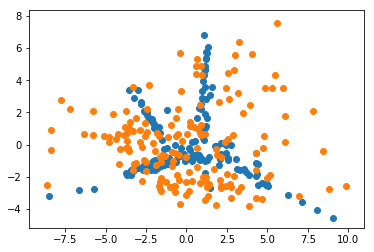

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(R[:,0], R[:,1])
plt.scatter(compare[:,0], compare[:,1])
plt.savefig('compare.png')

In [3]:
import pandas as pd
train = pd.read_csv('athlete_events.csv')
train.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
train.shape

(271116, 15)

In [5]:
train[train['Year'] == 2000].groupby(by=['Sex'])['Age'].min()

Sex
F    13.0
M    14.0
Name: Age, dtype: float64

In [8]:
train['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [9]:
train[train['City'].isin(['Sochi', 'Innsbruck'])].groupby(by=['City', 'Season']).groups

{('Innsbruck',
  'Winter'): Int64Index([    85,    265,    628,    629,    674,   1208,   1631,   1632,
               1689,   1690,
             ...
             270479, 270541, 270823, 270824, 270854, 270859, 270860, 270861,
             270888, 271111],
            dtype='int64', length=3639),
 ('Sochi',
  'Winter'): Int64Index([    40,    252,    277,    278,    809,    810,    811,    942,
                943,    947,
             ...
             270609, 270610, 270675, 270928, 270929, 270930, 270966, 270967,
             271112, 271113],
            dtype='int64', length=4891)}

In [15]:
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(train.values)

array([[1, 'A Dijiang', 'M', ..., 'Basketball',
        "Basketball Men's Basketball", nan],
       [2, 'A Lamusi', 'M', ..., 'Judo', "Judo Men's Extra-Lightweight",
        nan],
       [3, 'Gunnar Nielsen Aaby', 'M', ..., 'Football',
        "Football Men's Football", nan],
       ...,
       [135570, 'Piotr ya', 'M', ..., 'Ski Jumping',
        "Ski Jumping Men's Large Hill, Team", nan],
       [135571, 'Tomasz Ireneusz ya', 'M', ..., 'Bobsleigh',
        "Bobsleigh Men's Four", nan],
       [135571, 'Tomasz Ireneusz ya', 'M', ..., 'Bobsleigh',
        "Bobsleigh Men's Four", nan]], dtype=object)